<a href="https://colab.research.google.com/github/dariorfm/colab/blob/main/marketingCampaing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/marketing_campaign_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [ ]:
df.describe()


,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [ ]:
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.Date

,Date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
199995,2021-12-07
199996,2021-12-08
199997,2021-12-09
199998,2021-12-10


In [ ]:
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(int)
df.Duration

,Duration
0,30
1,60
2,30
3,60
4,15
...,...
199995,30
199996,15
199997,45
199998,30


In [ ]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [ ]:
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)
df.Acquisition_Cost

,Acquisition_Cost
0,16174.0
1,11566.0
2,10200.0
3,12724.0
4,16452.0
...,...
199995,18365.0
199996,8168.0
199997,13397.0
199998,18508.0


In [ ]:
print(df[['Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']].describe())


       Conversion_Rate            ROI         Clicks    Impressions  \
count    200000.000000  200000.000000  200000.000000  200000.000000   
mean          0.080070       5.002438     549.772030    5507.301520   
std           0.040602       1.734488     260.019056    2596.864286   
min           0.010000       2.000000     100.000000    1000.000000   
25%           0.050000       3.500000     325.000000    3266.000000   
50%           0.080000       5.010000     550.000000    5517.500000   
75%           0.120000       6.510000     775.000000    7753.000000   
max           0.150000       8.000000    1000.000000   10000.000000   

       Engagement_Score  
count     200000.000000  
mean           5.494710  
std            2.872581  
min            1.000000  
25%            3.000000  
50%            5.000000  
75%            8.000000  
max           10.000000  


In [ ]:
print(df['Campaign_Type'].value_counts())
print(df['Channel_Used'].value_counts())
print(df['Target_Audience'].value_counts())


Campaign_Type
Influencer      40169
Search          40157
Display         39987
Email           39870
Social Media    39817
Name: count, dtype: int64
Channel_Used
Email         33599
Google Ads    33438
YouTube       33392
Instagram     33392
Website       33360
Facebook      32819
Name: count, dtype: int64
Target_Audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64


# **Tasa de clicks**

In [ ]:
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100
df.CTR

,CTR
0,26.326743
1,1.541938
2,7.586386
3,11.923077
4,9.021662
...,...
199995,14.328657
199996,7.431551
199997,7.572266
199998,19.109663


# **Costo por clicks**

In [ ]:
df['CPC'] = df['Acquisition_Cost'] / df['Clicks']
df.CPC

,CPC
0,31.964427
1,99.706897
2,17.465753
3,58.635945
4,43.408971
...,...
199995,21.404429
199996,35.824561
199997,18.529737
199998,35.053030


In [ ]:
df['CPA'] = df['Acquisition_Cost'] / df['Engagement_Score']
df.CPA

,CPA
0,2695.666667
1,1652.285714
2,10200.000000
3,1817.714286
4,5484.000000
...,...
199995,18365.000000
199996,1166.857143
199997,4465.666667
199998,18508.000000


In [ ]:
print(df[['CTR', 'CPC', 'CPA']].describe())


                 CTR            CPC            CPA
count  200000.000000  200000.000000  200000.000000
mean       14.040550      32.008490    3670.191949
std        13.088122      26.926121    3715.577551
min         1.005429       5.021084     500.000000
25%         5.860555      15.091967    1480.600000
50%         9.978933      22.774008    2277.366667
75%        16.969863      38.599088    4170.500000
max        99.202393     199.960000   20000.000000


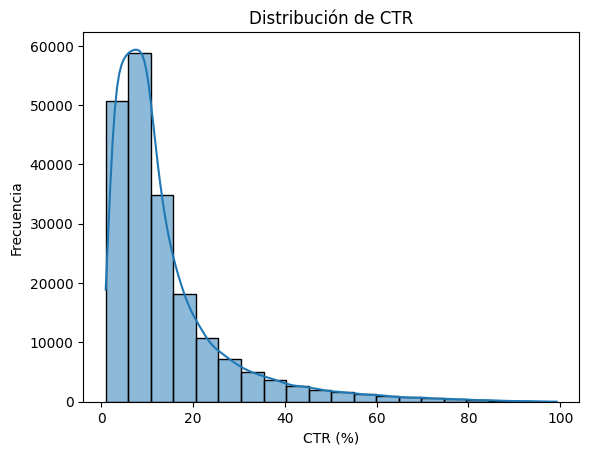

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma del CTR
sns.histplot(df['CTR'], bins=20, kde=True)
plt.title('Distribución de CTR')
plt.xlabel('CTR (%)')
plt.ylabel('Frecuencia')
plt.show()


Channel_Used
YouTube       14.119605
Website       14.097136
Email         14.054269
Facebook      14.049926
Instagram     14.003691
Google Ads    13.918967
Name: CTR, dtype: float64


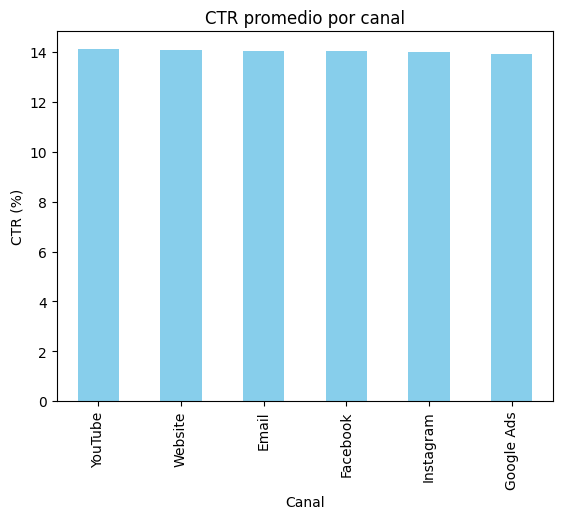

In [ ]:
# CTR promedio por canal
ctr_by_channel = df.groupby('Channel_Used')['CTR'].mean().sort_values(ascending=False)
print(ctr_by_channel)

# Gráfico de barras
ctr_by_channel.plot(kind='bar', color='skyblue')
plt.title('CTR promedio por canal')
plt.ylabel('CTR (%)')
plt.xlabel('Canal')
plt.show()


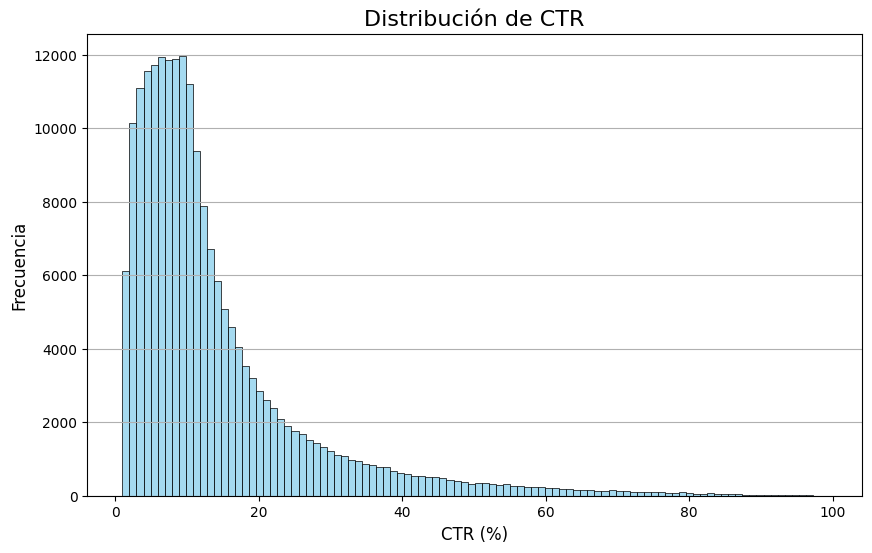

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de CTR
plt.figure(figsize=(10, 6))
sns.histplot(df['CTR'], bins=100, color='skyblue')
plt.title('Distribución de CTR', fontsize=16)
plt.xlabel('CTR (%)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y')
plt.show()


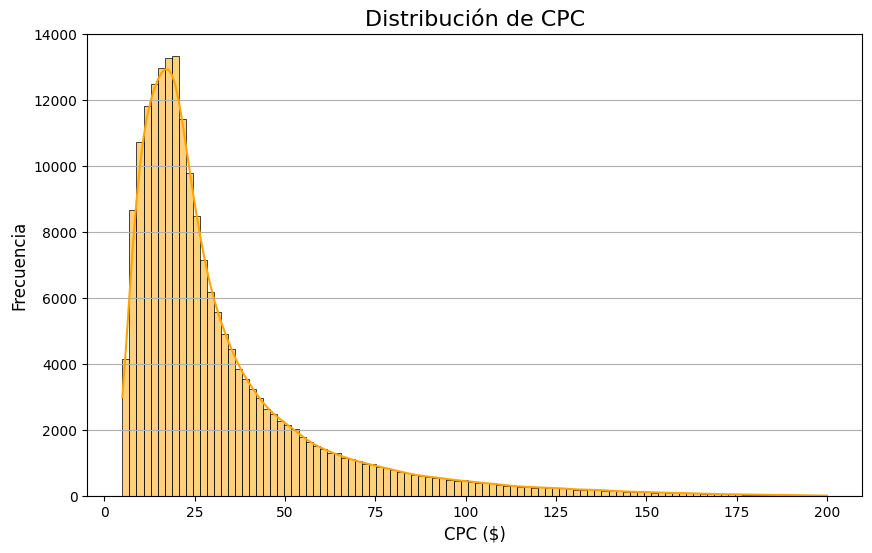

In [ ]:
# Histograma de CPC
plt.figure(figsize=(10, 6))
sns.histplot(df['CPC'], bins=100, kde=True, color='orange')
plt.title('Distribución de CPC', fontsize=16)
plt.xlabel('CPC ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y')
plt.show()


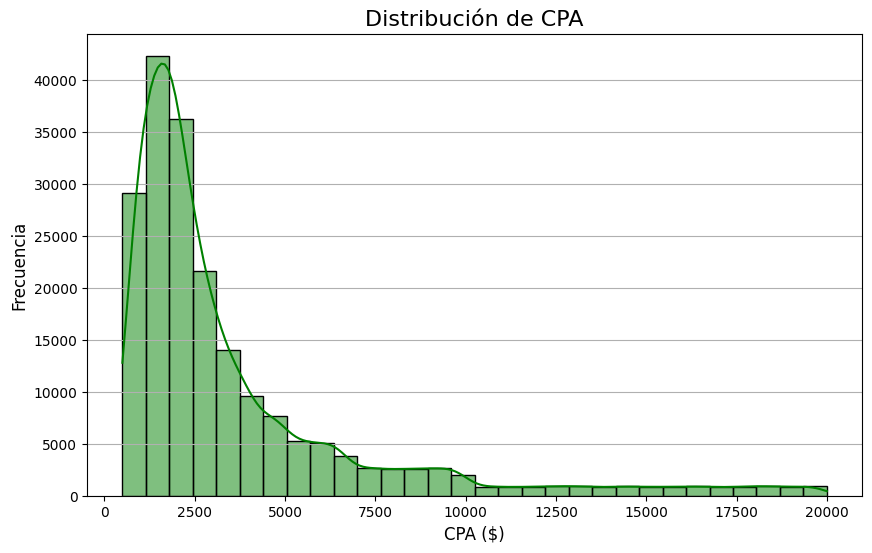

In [ ]:
# Histograma de CPA
plt.figure(figsize=(10, 6))
sns.histplot(df['CPA'], bins=30, kde=True, color='green')
plt.title('Distribución de CPA', fontsize=16)
plt.xlabel('CPA ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y')
plt.show()


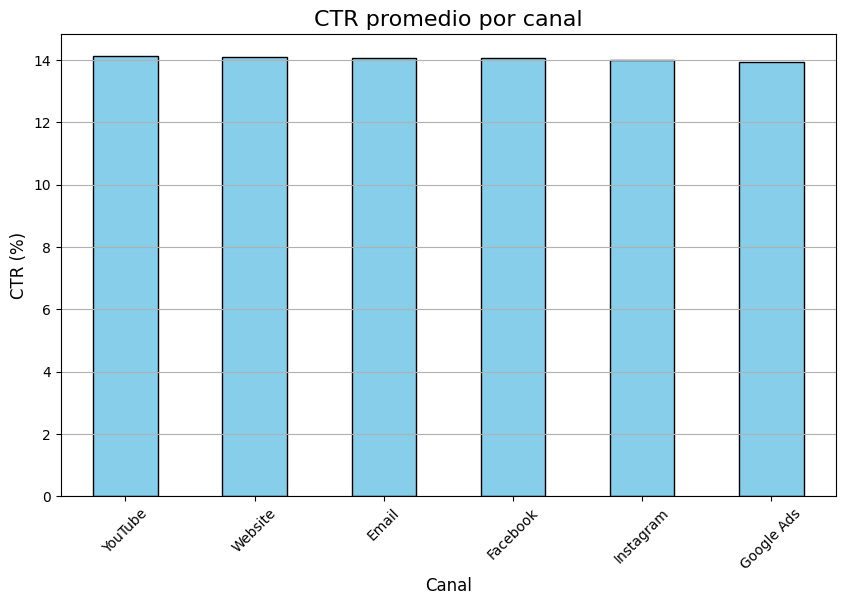

In [ ]:
# CTR promedio por canal
ctr_by_channel = df.groupby('Channel_Used')['CTR'].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
ctr_by_channel.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('CTR promedio por canal', fontsize=16)
plt.ylabel('CTR (%)', fontsize=12)
plt.xlabel('Canal', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


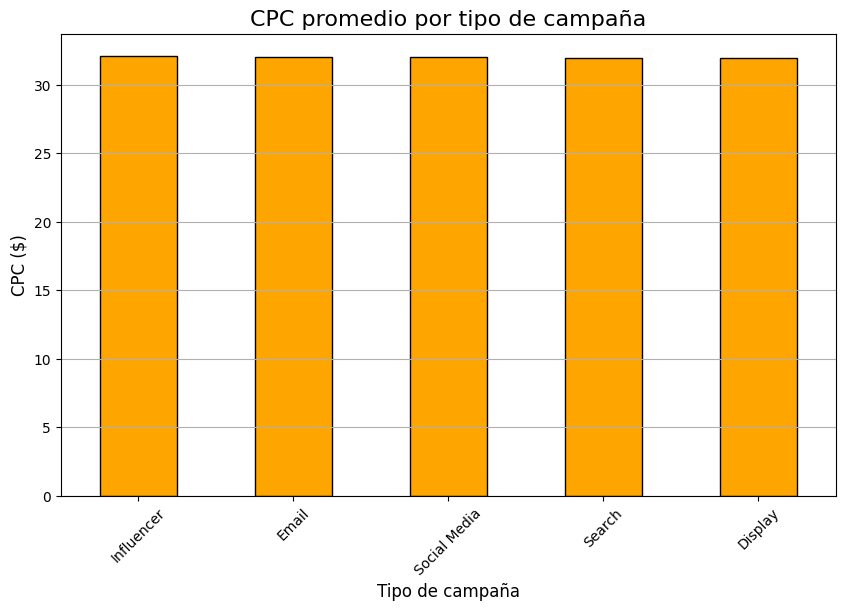

In [ ]:
# CPC promedio por tipo de campaña
cpc_by_campaign = df.groupby('Campaign_Type')['CPC'].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
cpc_by_campaign.plot(kind='bar', color='orange', edgecolor='black')
plt.title('CPC promedio por tipo de campaña', fontsize=16)
plt.ylabel('CPC ($)', fontsize=12)
plt.xlabel('Tipo de campaña', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


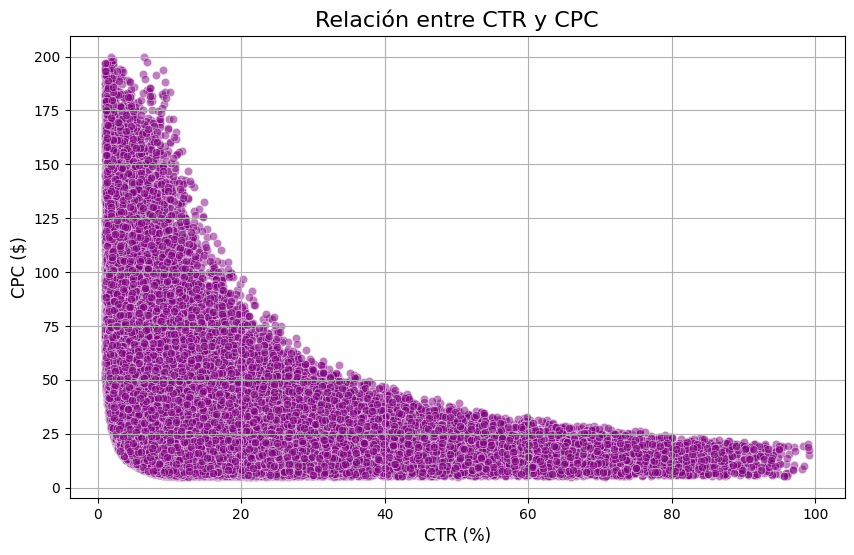

In [ ]:
# Relación entre CTR y CPC
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['CTR'], y=df['CPC'], alpha=0.5, color='purple')
plt.title('Relación entre CTR y CPC', fontsize=16)
plt.xlabel('CTR (%)', fontsize=12)
plt.ylabel('CPC ($)', fontsize=12)
plt.grid(True)
plt.show()
